In [25]:
import numpy as np
import pandas as pd

In [26]:
sol = pd.read_csv(r'C:\Users\Aditya\Data Science Jupiter\2cents\task\SOLUSDT_1m.csv')

In [27]:
sol.head()

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2020-08-11 06:00:00,2.8500,2.8500,2.8500,2.8500,3.60,1597125659999,10.260000,1,3.60,10.260000,0
1,2020-08-11 06:01:00,2.8500,2.8500,2.8500,2.8500,0.00,1597125719999,0.000000,0,0.00,0.000000,0
2,2020-08-11 06:02:00,2.8500,2.8500,2.8500,2.8500,0.00,1597125779999,0.000000,0,0.00,0.000000,0
3,2020-08-11 06:03:00,3.4699,3.4700,3.0003,3.0003,3410.31,1597125839999,10299.622712,7,3376.90,10199.382689,0
4,2020-08-11 06:04:00,3.1852,3.1852,3.1852,3.1852,313.95,1597125899999,999.993540,1,313.95,999.993540,0


In [28]:
sol.shape

(2106357, 12)

In [29]:
sol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106357 entries, 0 to 2106356
Data columns (total 12 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   timestamp                     object 
 1   open                          float64
 2   high                          float64
 3   low                           float64
 4   close                         float64
 5   volume                        float64
 6   close_time                    int64  
 7   quote_asset_volume            float64
 8   number_of_trades              int64  
 9   taker_buy_base_asset_volume   float64
 10  taker_buy_quote_asset_volume  float64
 11  ignore                        int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 192.8+ MB


In [30]:
sol.isnull().sum()


timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
close_time                      0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
ignore                          0
dtype: int64

In [31]:
sol['SMA_10'] = sol['close'].rolling(window=10).mean()

In [32]:
sol['EMA_10'] = sol['close'].ewm(span=10, adjust=False).mean()

In [33]:
def compute_RSI(data, window=14):
    delta = data['close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI


sol['RSI'] = compute_RSI(sol, window=14)

In [34]:
sol['EMA_12'] = sol['close'].ewm(span=12, adjust=False).mean()
sol['EMA_26'] = sol['close'].ewm(span=26, adjust=False).mean()
sol['MACD'] = sol['EMA_12'] - sol['EMA_26']
sol['MACD_Signal'] = sol['MACD'].ewm(span=9, adjust=False).mean()
sol['MACD_Hist'] = sol['MACD'] - sol['MACD_Signal']


In [35]:
sol['High_Low_Spread'] = sol['high'] - sol['low']

In [36]:
sol['Volatility'] = sol['close'].rolling(window=10).std()

In [37]:
sol['Momentum'] = sol['close'] - sol['close'].shift(5)

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


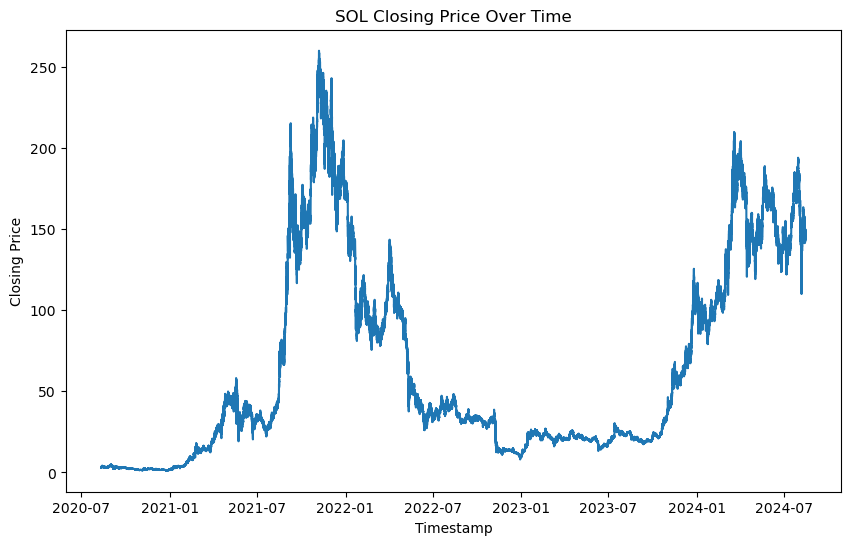

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns


sol['timestamp'] = pd.to_datetime(sol['timestamp'])


plt.figure(figsize=(10,6))
sns.lineplot(data=sol, x='timestamp', y='close')
plt.title('SOL Closing Price Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Closing Price')
plt.show()



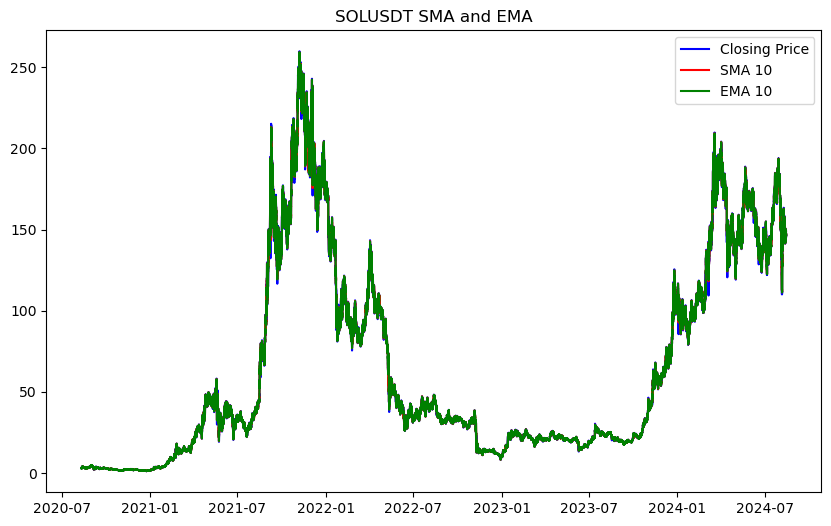

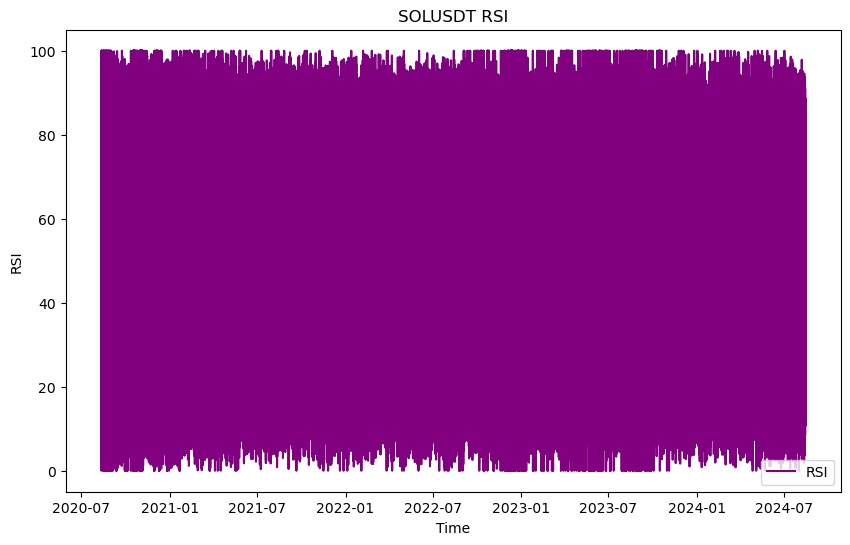

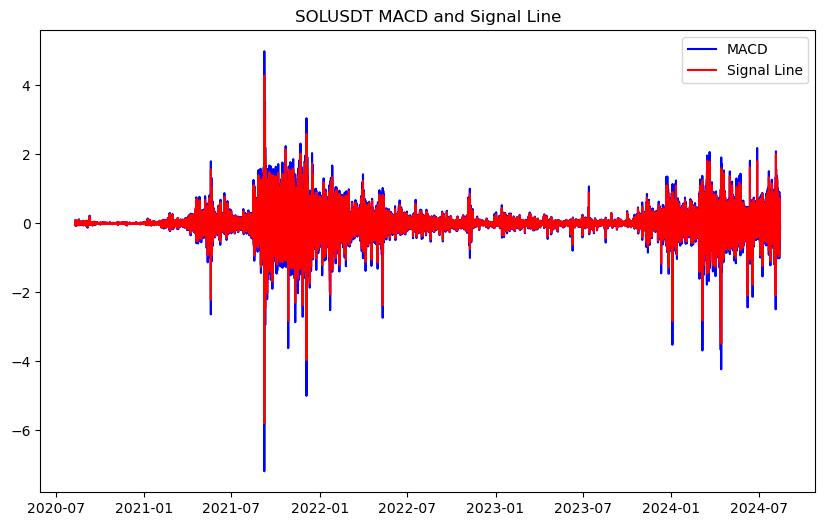

D:\anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


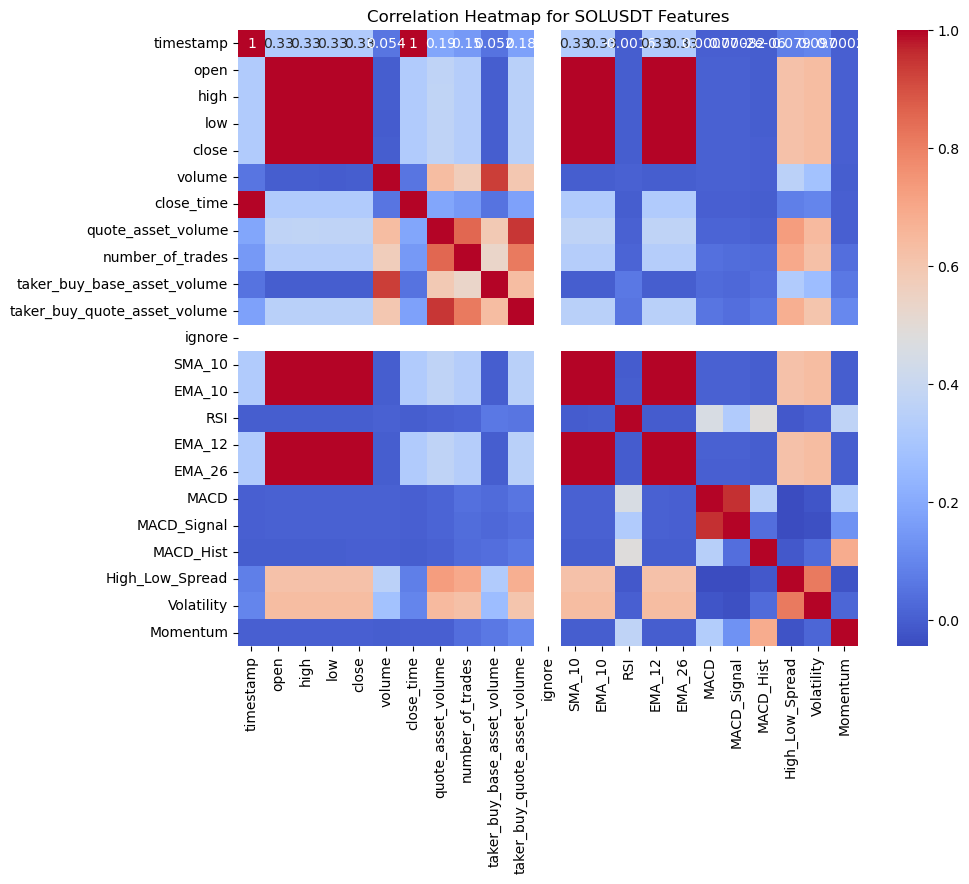

In [39]:
#Moving Averages
plt.figure(figsize=(10,6))
plt.plot(sol['timestamp'], sol['close'], label='Closing Price', color='blue')
plt.plot(sol['timestamp'], sol['SMA_10'], label='SMA 10', color='red')
plt.plot(sol['timestamp'], sol['EMA_10'], label='EMA 10', color='green')
plt.title('SOLUSDT SMA and EMA')
plt.legend()
plt.show()


#RSI
plt.figure(figsize=(10,6))
plt.plot(sol['timestamp'], sol['RSI'], label='RSI', color='purple')
plt.title('SOLUSDT RSI')
plt.xlabel('Time')
plt.ylabel('RSI')
plt.legend()
plt.show()

#MACD and Signal Line
plt.figure(figsize=(10,6))
plt.plot(sol['timestamp'], sol['MACD'], label='MACD', color='blue')
plt.plot(sol['timestamp'], sol['MACD_Signal'], label='Signal Line', color='red')
plt.title('SOLUSDT MACD and Signal Line')
plt.legend()
plt.show()

# Correlation heatmap of features
plt.figure(figsize=(10,8))
sns.heatmap(sol.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for SOLUSDT Features')
plt.show()


In [40]:
# from sklearn.preprocessing import StandardScaler


# features = ['open', 'high', 'low', 'close', 'volume', 'SMA_10', 'EMA_10', 'RSI', 'MACD_Hist', 'High_Low_Spread', 'Momentum', 'Volatility']
# scaler = StandardScaler()


# sol_scaled = pd.DataFrame(scaler.fit_transform(sol[features]), columns=features)


In [42]:

sol['Target'] = (sol['close'].shift(-1) > sol['close']).astype(int)


sol = sol[:-1]


In [43]:
from sklearn.model_selection import train_test_split


features = ['open', 'high', 'low', 'close', 'volume', 'SMA_10', 'EMA_10', 'RSI', 'MACD_Hist', 'High_Low_Spread', 'Momentum', 'Volatility']


X = sol[features]
y = sol['Target']




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [47]:
import kerastuner as kt
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout, BatchNormalization


In [48]:

def build_model(hp):
    model = Sequential()
    cnt = 0

    for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
        if cnt == 0:
            # First layer with input dimension
            model.add(
                Dense(
                    units=hp.Int('units' + str(i), min_value=8, max_value=128, step=8),
                    activation=hp.Choice('activation' + str(i), values=['relu', 'tanh', 'sigmoid']),
                    input_dim=len(features)  # Match input to the number of features
                )
            )
            model.add(BatchNormalization())  # Add batch normalization
            model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))

        else:
            # Hidden layers
            model.add(
                Dense(
                    units=hp.Int('units' + str(i), min_value=8, max_value=128, step=8),
                    activation=hp.Choice('activation' + str(i), values=['relu', 'tanh', 'sigmoid'])
                )
            )
            model.add(BatchNormalization())  # Add batch normalization
            model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))

        cnt += 1

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(
        optimizer=hp.Choice('optimizer', values=['rmsprop', 'adam', 'sgd', 'nadam', 'adadelta']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


In [49]:
tuner = kt.RandomSearch(build_model,objective = 'val_accuracy',max_trials = 5,directory='my_dirt',# Optional: specify directory to save search results
    project_name='final')

In [51]:
tuner.search(X_train,y_train,epochs = 5, validation_data = (X_test,y_test))

Trial 5 Complete [00h 10m 04s]
val_accuracy: 0.5193793773651123

Best val_accuracy So Far: 0.5193793773651123
Total elapsed time: 00h 47m 09s


In [52]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters:", best_hps.values)


Best Hyperparameters: {'num_layers': 9, 'units0': 24, 'activation0': 'relu', 'dropout0': 0.3, 'optimizer': 'rmsprop', 'units1': 8, 'activation1': 'relu', 'dropout1': 0.1, 'units2': 8, 'activation2': 'relu', 'dropout2': 0.1, 'units3': 8, 'activation3': 'relu', 'dropout3': 0.1, 'units4': 8, 'activation4': 'relu', 'dropout4': 0.1, 'units5': 8, 'activation5': 'relu', 'dropout5': 0.1, 'units6': 8, 'activation6': 'relu', 'dropout6': 0.1, 'units7': 8, 'activation7': 'relu', 'dropout7': 0.1, 'units8': 8, 'activation8': 'relu', 'dropout8': 0.1}


In [53]:
model = tuner.get_best_models(num_models = 1)[0]

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\anaconda\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 40 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
model.fit(X_train,y_train,epochs = 100, initial_epoch = 6,validation_data = (X_test,y_test))

Epoch 7/100
52659/52659 ━━━━━━━━━━━━━━━━━━━━ 109s 2ms/step - accuracy: 0.5625 - loss: 0.6854 - val_accuracy: 0.5194 - val_loss: 0.6951
Epoch 8/100
52659/52659 ━━━━━━━━━━━━━━━━━━━━ 103s 2ms/step - accuracy: 0.5622 - loss: 0.6854 - val_accuracy: 0.5194 - val_loss: 0.6960
Epoch 9/100
52659/52659 ━━━━━━━━━━━━━━━━━━━━ 102s 2ms/step - accuracy: 0.5618 - loss: 0.6855 - val_accuracy: 0.5194 - val_loss: 0.6956
Epoch 10/100
52659/52659 ━━━━━━━━━━━━━━━━━━━━ 102s 2ms/step - accuracy: 0.5626 - loss: 0.6853 - val_accuracy: 0.5194 - val_loss: 0.6945
Epoch 11/100
52659/52659 ━━━━━━━━━━━━━━━━━━━━ 111s 2ms/step - accuracy: 0.5630 - loss: 0.6852 - val_accuracy: 0.5194 - val_loss: 0.6975
Epoch 12/100
52659/52659 ━━━━━━━━━━━━━━━━━━━━ 101s 2ms/step - accuracy: 0.5622 - loss: 0.6854 - val_accuracy: 0.5194 - val_loss: 0.6953
Epoch 13/100
52659/52659 ━━━━━━━━━━━━━━━━━━━━ 102s 2ms/step - accuracy: 0.5629 - loss: 0.6852 - val_accuracy: 0.5194 - val_loss: 0.6962
Epoch 14/100
52659/52659 ━━━━━━━━━━━━━━━━━━━━ 104s 